In [1]:
import anndata as ad
import squidpy as sq
import cellcharter as cc
import pandas as pd
import scanpy as sc
import scvi
import numpy as np
import matplotlib.pyplot as plt
import tqdm as notebook_tqdm

/home/xu262605/anaconda3/envs/cellcharter/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Global seed set to 0


In [4]:
path = '/work/rwth1209/dana_projects/test_new_imputation_tools/enVI/ref/complete_spatial_vk12_coarse_annotation.h5ad'

In [5]:
adata = sc.read_h5ad(f"{path}")
adata

AnnData object with n_obs × n_vars = 217184 × 500
    obs: 'fov', 'volume', 'min_x', 'min_y', 'max_x', 'max_y', 'anisotropy', 'transcript_count', 'perimeter_area_ratio', 'solidity', 'Cellbound2_raw', 'Cellbound2_high_pass', 'Cellbound3_raw', 'Cellbound3_high_pass', 'PolyT_raw', 'PolyT_high_pass', 'Cellbound1_raw', 'Cellbound1_high_pass', 'DAPI_raw', 'DAPI_high_pass', 'region', 'n_counts', 'leiden_0_5', 'leiden_1', 'leiden_1_5', 'tacco', 'cell_type'
    var: 'mean', 'std'
    uns: 'cell_type_colors', 'leiden', 'leiden_0_5_colors', 'leiden_1_5_colors', 'leiden_1_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'spatial', 'tacco_colors', 'umap'
    obsm: 'X_pca', 'X_umap', 'blank_genes', 'spatial', 'tacco'
    varm: 'PCs', 'tacco'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [6]:
#sc.pp.filter_genes(adata, min_counts=1)
sc.pp.filter_cells(adata, min_counts=1)

In [7]:
adata

AnnData object with n_obs × n_vars = 87215 × 500
    obs: 'fov', 'volume', 'min_x', 'min_y', 'max_x', 'max_y', 'anisotropy', 'transcript_count', 'perimeter_area_ratio', 'solidity', 'Cellbound2_raw', 'Cellbound2_high_pass', 'Cellbound3_raw', 'Cellbound3_high_pass', 'PolyT_raw', 'PolyT_high_pass', 'Cellbound1_raw', 'Cellbound1_high_pass', 'DAPI_raw', 'DAPI_high_pass', 'region', 'n_counts', 'leiden_0_5', 'leiden_1', 'leiden_1_5', 'tacco', 'cell_type'
    var: 'mean', 'std'
    uns: 'leiden', 'leiden_1_5_colors', 'leiden_1_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'spatial', 'tacco_colors', 'umap'
    obsm: 'X_pca', 'X_umap', 'blank_genes', 'spatial', 'tacco'
    varm: 'PCs', 'tacco'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [8]:
adata.X.max()

10.0

In [9]:
# adata.layers["counts"] = adata.X.copy()

# sc.pp.normalize_total(adata, target_sum=1e6)
# sc.pp.log1p(adata)

In [10]:
adata

AnnData object with n_obs × n_vars = 87215 × 500
    obs: 'fov', 'volume', 'min_x', 'min_y', 'max_x', 'max_y', 'anisotropy', 'transcript_count', 'perimeter_area_ratio', 'solidity', 'Cellbound2_raw', 'Cellbound2_high_pass', 'Cellbound3_raw', 'Cellbound3_high_pass', 'PolyT_raw', 'PolyT_high_pass', 'Cellbound1_raw', 'Cellbound1_high_pass', 'DAPI_raw', 'DAPI_high_pass', 'region', 'n_counts', 'leiden_0_5', 'leiden_1', 'leiden_1_5', 'tacco', 'cell_type'
    var: 'mean', 'std'
    uns: 'leiden', 'leiden_1_5_colors', 'leiden_1_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'spatial', 'tacco_colors', 'umap'
    obsm: 'X_pca', 'X_umap', 'blank_genes', 'spatial', 'tacco'
    varm: 'PCs', 'tacco'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [11]:
adata.obs

fov       volume        min_x         min_y  \
3325265900002100001    22  2886.628438  8857.740244   9573.972300   
3325265900002100013    22  2718.114498  8869.611733   9597.779039   
3325265900002100018    22  2099.689711  8945.705322   9603.049285   
3325265900002100023    22  1839.210643  8905.900696   9622.146514   
3325265900002100025    22  1766.958535  8916.052474   9626.682381   
...                   ...          ...          ...           ...   
3325268800170200179  2447   430.241505  1073.109528  11300.895965   
3325268800170200195  2447   688.978318  1088.908128  11320.220645   
3325268800170200214  2449  1500.007513  1493.772515  11340.658289   
3325268800171100101  2440  1865.164374  1640.961483  11186.741518   
3325268800171100123  2450  1896.182414  1649.663235  11217.878536   

                           max_x         max_y  anisotropy  transcript_count  \
3325265900002100001  8872.406847   9601.736165    1.945604                27   
3325265900002100013  8886.651280   9622.239265    1.554463               148   
3325265900002100018  8961.519481   9620.899536    1.163686                44   
3325265900002100023  8918.637869   9644.325352    2.127845               132   
3325265900002100025  8929.976547   9642.632456    1.190092                42   
...                          ...           ...         ...               ...   
3325268800170200179  1080.573404  11308.766971    1.359034                26   
3325268800170200195  1100.351895  11332.379222    2.310785                28   
3325268800170200214  1504.765619  11358.395733    1.731947               103   
3325268800171100101  1657.308949  11204.468358    1.053286               160   
3325268800171100123  1662.895502  11240.725767    1.803329               162   

                     perimeter_area_ratio  solidity  ...  \
3325265900002100001              0.275619  5.914615  ...   
3325265900002100013              0.246088  6.677330  ...   
3325265900002100018              0.265982  6.957701  ...   
3325265900002100023              0.330637  6.405183  ...   
3325265900002100025              0.279851  6.949542  ...   
...                                   ...       ...  ...   
3325268800170200179              0.598308  6.761362  ...   
3325268800170200195              0.549081  6.336052  ...   
3325268800170200214              0.336777  6.506415  ...   
3325268800171100101              0.315365  6.179487  ...   
3325268800171100123              0.339478  5.913840  ...   

                     Cellbound1_high_pass      DAPI_raw  DAPI_high_pass  \
3325265900002100001          9.769555e+05  1.005999e+09    1.506097e+07   
3325265900002100013          7.498088e+05  8.885033e+08    9.277487e+06   
3325265900002100018          5.391121e+05  7.187088e+08    8.656885e+06   
3325265900002100023          4.608534e+05  1.125899e+09    1.143670e+07   
3325265900002100025          4.921904e+05  1.421291e+09    1.377025e+07   
...                                   ...           ...             ...   
3325268800170200179          5.102208e+05  2.211455e+08    3.285782e+06   
3325268800170200195          9.774401e+05  4.200903e+08    6.585775e+06   
3325268800170200214          9.089984e+05  5.365640e+08    6.873316e+06   
3325268800171100101          1.035700e+06  7.965828e+08    7.474991e+06   
3325268800171100123          1.263119e+06  4.754047e+08    5.724990e+06   

                     region   n_counts  leiden_0_5  leiden_1  leiden_1_5  \
3325265900002100001       0  14.460983           6        12          15   
3325265900002100013       0  22.746571           6        12          15   
3325265900002100018       0  12.977996           6        12          15   
3325265900002100023       0   5.534679           6        12          15   
3325265900002100025       0  76.009460           0         6           1   
...                     ...        ...         ...       ...         ...   
3325268800170200179       3  24.162905           2         7           6   
33

In [12]:
scvi.settings.seed = 12345
scvi.model.SCVI.setup_anndata(
    adata, 
    layer="counts", batch_key='region')

Global seed set to 12345
/home/xu262605/anaconda3/envs/cellcharter/lib/python3.10/abc.py:119: FutureWarning: SparseDataset is deprecated and will be removed in late 2024. It has been replaced by the public classes CSRDataset and CSCDataset.

For instance checks, use `isinstance(X, (anndata.experimental.CSRDataset, anndata.experimental.CSCDataset))` instead.

For creation, use `anndata.experimental.sparse_dataset(X)` instead.

  return _abc_instancecheck(cls, instance)
No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [13]:
model = scvi.model.SCVI(adata)

In [14]:
model.train(early_stopping=True, enable_progress_bar=True)

/home/xu262605/anaconda3/envs/cellcharter/lib/python3.10/site-packages/lightning_fabric/plugins/environments/slurm.py:165: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/xu262605/anaconda3/envs/cellcharter/lib/python ...
  rank_zero_warn(
/home/xu262605/anaconda3/envs/cellcharter/lib/python3.10/site-packages/lightning_fabric/plugins/environments/slurm.py:165: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/xu262605/anaconda3/envs/cellcharter/lib/python ...
  rank_zero_warn(


Epoch 1/92:   0%|          | 0/92 [00:00<?, ?it/s]

/home/xu262605/anaconda3/envs/cellcharter/lib/python3.10/abc.py:119: FutureWarning: SparseDataset is deprecated and will be removed in late 2024. It has been replaced by the public classes CSRDataset and CSCDataset.

For instance checks, use `isinstance(X, (anndata.experimental.CSRDataset, anndata.experimental.CSCDataset))` instead.

For creation, use `anndata.experimental.sparse_dataset(X)` instead.

  return _abc_instancecheck(cls, instance)


Epoch 92/92: 100%|██████████| 92/92 [19:51<00:00, 12.95s/it, loss=120, v_num=1]


In [15]:
adata.obsm['X_scVI'] = model.get_latent_representation(adata).astype(np.float32)

In [16]:
sq.gr.spatial_neighbors(adata, coord_type='generic', delaunay=True, spatial_key='spatial')
cc.gr.remove_long_links(adata)

In [17]:
cc.gr.aggregate_neighbors(adata, n_layers=3, use_rep='X_scVI', out_key='X_cellcharter')

100%|██████████| 4/4 [00:00<00:00,  8.06it/s]


In [18]:
autok = cc.tl.ClusterAutoK(
    n_clusters=(2,10), 
    max_runs=10, 
    model_params=dict(
        random_state=12345,
        # If running on GPU
        #trainer_params=dict(accelerator='gpu', devices=1)
    )
)

In [19]:
autok.fit(adata, use_rep='X_cellcharter')

Iteration 1/10


  0%|          | 0/11 [00:00<?, ?it/s]

/home/xu262605/anaconda3/envs/cellcharter/lib/python3.10/site-packages/lightning_fabric/plugins/environments/slurm.py:165: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/xu262605/anaconda3/envs/cellcharter/lib/python ...
  rank_zero_warn(
  9%|▉         | 1/11 [00:00<00:07,  1.40it/s]/home/xu262605/anaconda3/envs/cellcharter/lib/python3.10/site-packages/lightning_fabric/plugins/environments/slurm.py:165: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/xu262605/anaconda3/envs/cellcharter/lib/python ...
  rank_zero_warn(
 18%|█▊        | 2/11 [00:01<00:06,  1.31it/s]/home/xu262605/anaconda3/envs/cellcharter/lib/python3.10/site-packages/lightning_fabric/plugins/environments/slu

Iteration 2/10


  0%|          | 0/11 [00:00<?, ?it/s]/home/xu262605/anaconda3/envs/cellcharter/lib/python3.10/site-packages/lightning_fabric/plugins/environments/slurm.py:165: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/xu262605/anaconda3/envs/cellcharter/lib/python ...
  rank_zero_warn(
  9%|▉         | 1/11 [00:00<00:03,  3.19it/s]/home/xu262605/anaconda3/envs/cellcharter/lib/python3.10/site-packages/lightning_fabric/plugins/environments/slurm.py:165: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/xu262605/anaconda3/envs/cellcharter/lib/python ...
  rank_zero_warn(
 18%|█▊        | 2/11 [00:01<00:05,  1.53it/s]/home/xu262605/anaconda3/envs/cellcharter/lib/python3.10/site-packages/lig

Iteration 3/10


  0%|          | 0/11 [00:00<?, ?it/s]/home/xu262605/anaconda3/envs/cellcharter/lib/python3.10/site-packages/lightning_fabric/plugins/environments/slurm.py:165: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/xu262605/anaconda3/envs/cellcharter/lib/python ...
  rank_zero_warn(
  9%|▉         | 1/11 [00:00<00:03,  2.93it/s]/home/xu262605/anaconda3/envs/cellcharter/lib/python3.10/site-packages/lightning_fabric/plugins/environments/slurm.py:165: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/xu262605/anaconda3/envs/cellcharter/lib/python ...
  rank_zero_warn(
 18%|█▊        | 2/11 [00:01<00:05,  1.57it/s]/home/xu262605/anaconda3/envs/cellcharter/lib/python3.10/site-packages/lig

Iteration 4/10


  0%|          | 0/11 [00:00<?, ?it/s]/home/xu262605/anaconda3/envs/cellcharter/lib/python3.10/site-packages/lightning_fabric/plugins/environments/slurm.py:165: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/xu262605/anaconda3/envs/cellcharter/lib/python ...
  rank_zero_warn(
  9%|▉         | 1/11 [00:00<00:02,  3.41it/s]/home/xu262605/anaconda3/envs/cellcharter/lib/python3.10/site-packages/lightning_fabric/plugins/environments/slurm.py:165: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/xu262605/anaconda3/envs/cellcharter/lib/python ...
  rank_zero_warn(
 18%|█▊        | 2/11 [00:01<00:07,  1.19it/s]/home/xu262605/anaconda3/envs/cellcharter/lib/python3.10/site-packages/lig

Iteration 5/10


  0%|          | 0/11 [00:00<?, ?it/s]/home/xu262605/anaconda3/envs/cellcharter/lib/python3.10/site-packages/lightning_fabric/plugins/environments/slurm.py:165: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/xu262605/anaconda3/envs/cellcharter/lib/python ...
  rank_zero_warn(
  9%|▉         | 1/11 [00:00<00:03,  3.05it/s]/home/xu262605/anaconda3/envs/cellcharter/lib/python3.10/site-packages/lightning_fabric/plugins/environments/slurm.py:165: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/xu262605/anaconda3/envs/cellcharter/lib/python ...
  rank_zero_warn(
 18%|█▊        | 2/11 [00:01<00:05,  1.55it/s]/home/xu262605/anaconda3/envs/cellcharter/lib/python3.10/site-packages/lig

Iteration 6/10


  0%|          | 0/11 [00:00<?, ?it/s]/home/xu262605/anaconda3/envs/cellcharter/lib/python3.10/site-packages/lightning_fabric/plugins/environments/slurm.py:165: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/xu262605/anaconda3/envs/cellcharter/lib/python ...
  rank_zero_warn(
  9%|▉         | 1/11 [00:00<00:03,  3.08it/s]/home/xu262605/anaconda3/envs/cellcharter/lib/python3.10/site-packages/lightning_fabric/plugins/environments/slurm.py:165: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/xu262605/anaconda3/envs/cellcharter/lib/python ...
  rank_zero_warn(
 18%|█▊        | 2/11 [00:01<00:08,  1.07it/s]/home/xu262605/anaconda3/envs/cellcharter/lib/python3.10/site-packages/lig

Iteration 7/10


  0%|          | 0/11 [00:00<?, ?it/s]/home/xu262605/anaconda3/envs/cellcharter/lib/python3.10/site-packages/lightning_fabric/plugins/environments/slurm.py:165: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/xu262605/anaconda3/envs/cellcharter/lib/python ...
  rank_zero_warn(
  9%|▉         | 1/11 [00:00<00:03,  3.21it/s]/home/xu262605/anaconda3/envs/cellcharter/lib/python3.10/site-packages/lightning_fabric/plugins/environments/slurm.py:165: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/xu262605/anaconda3/envs/cellcharter/lib/python ...
  rank_zero_warn(
 18%|█▊        | 2/11 [00:01<00:05,  1.55it/s]/home/xu262605/anaconda3/envs/cellcharter/lib/python3.10/site-packages/lig

Convergence with a change in stability of 0.007880849795165547 reached after 7 iterations


/home/xu262605/anaconda3/envs/cellcharter/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/xu262605/anaconda3/envs/cellcharter/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


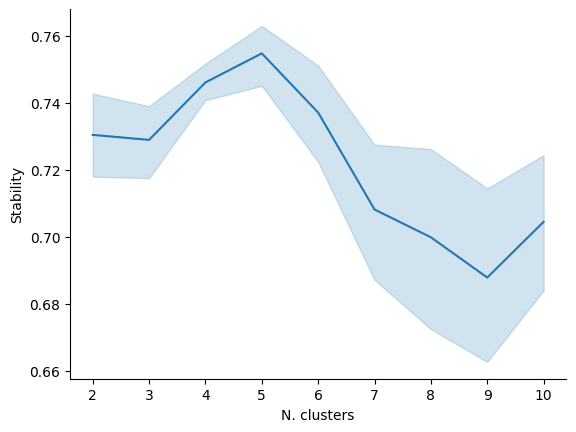

In [20]:
cc.pl.autok_stability(autok)

In [21]:
adata.obs['cluster_cellcharter'] = autok.predict(adata, use_rep='X_cellcharter')

/home/xu262605/anaconda3/envs/cellcharter/lib/python3.10/site-packages/lightning_fabric/plugins/environments/slurm.py:165: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/xu262605/anaconda3/envs/cellcharter/lib/python ...
  rank_zero_warn(


/home/xu262605/anaconda3/envs/cellcharter/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)


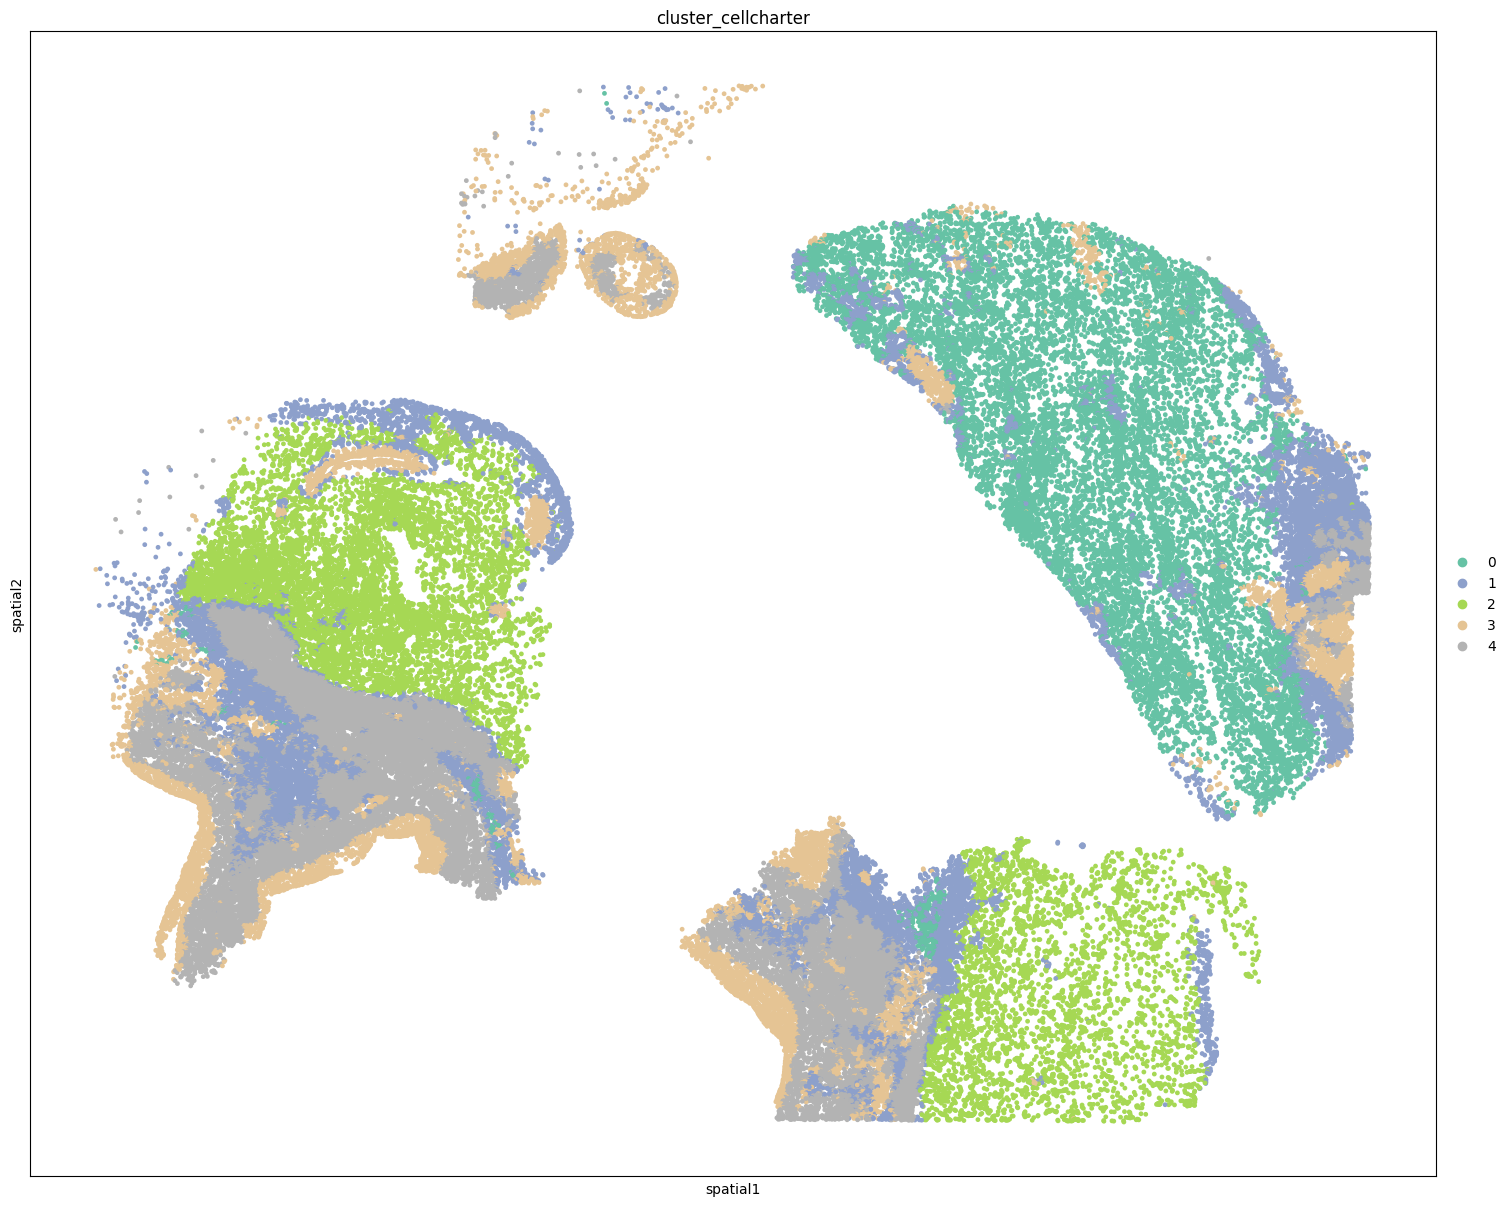

In [22]:
sq.pl.spatial_scatter(
    adata, 
    color=['cluster_cellcharter'], 
    #library_key='fov',  
    size=30, 
    img=None,
    spatial_key='spatial',
    palette='Set2',
    #connectivity_key='spatial_connectivities',
    #img_alpha=0.3,
    figsize=(15,15),
    ncols=1)

In [23]:
adata

AnnData object with n_obs × n_vars = 87215 × 500
    obs: 'fov', 'volume', 'min_x', 'min_y', 'max_x', 'max_y', 'anisotropy', 'transcript_count', 'perimeter_area_ratio', 'solidity', 'Cellbound2_raw', 'Cellbound2_high_pass', 'Cellbound3_raw', 'Cellbound3_high_pass', 'PolyT_raw', 'PolyT_high_pass', 'Cellbound1_raw', 'Cellbound1_high_pass', 'DAPI_raw', 'DAPI_high_pass', 'region', 'n_counts', 'leiden_0_5', 'leiden_1', 'leiden_1_5', 'tacco', 'cell_type', '_scvi_batch', '_scvi_labels', 'cluster_cellcharter'
    var: 'mean', 'std'
    uns: 'leiden', 'leiden_1_5_colors', 'leiden_1_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'spatial', 'tacco_colors', 'umap', '_scvi_uuid', '_scvi_manager_uuid', 'spatial_neighbors', 'cluster_cellcharter_colors'
    obsm: 'X_pca', 'X_umap', 'blank_genes', 'spatial', 'tacco', 'X_scVI', 'X_cellcharter'
    varm: 'PCs', 'tacco'
    layers: 'counts'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [24]:
gmm = cc.tl.Cluster(
    n_clusters=13, 
    random_state=12345,
    # If running on GPU
    #trainer_params=dict(accelerator='gpu', devices=1)
    )

In [25]:
gmm.fit(adata, use_rep='X_cellcharter')
adata.obs['spatial_cluster'] = gmm.predict(adata, use_rep='X_cellcharter')

/home/xu262605/anaconda3/envs/cellcharter/lib/python3.10/site-packages/lightning_fabric/plugins/environments/slurm.py:165: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/xu262605/anaconda3/envs/cellcharter/lib/python ...
  rank_zero_warn(


/home/xu262605/anaconda3/envs/cellcharter/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)


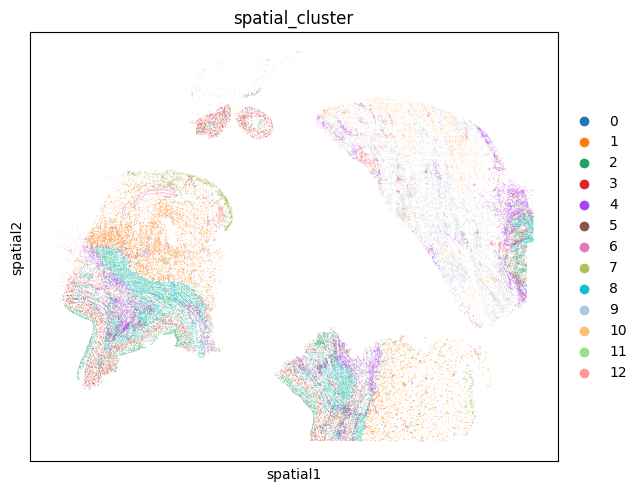

In [26]:
sq.pl.spatial_scatter(
    adata, 
    color='spatial_cluster',  
    img=None, 
    size=8,
    ncols=2)

In [27]:
adata.write_h5ad('cellcharter_heart500_vk12.h5ad')

In [33]:
adata=sc.read_h5ad('/work/rwth1209/dana_projects/spatial_domain_tools/CellCharter/heart_500_vk12/cellcharter_heart500_vk12.h5ad')

In [28]:
adata.obs

fov       volume        min_x         min_y  \
3325265900002100001    22  2886.628438  8857.740244   9573.972300   
3325265900002100013    22  2718.114498  8869.611733   9597.779039   
3325265900002100018    22  2099.689711  8945.705322   9603.049285   
3325265900002100023    22  1839.210643  8905.900696   9622.146514   
3325265900002100025    22  1766.958535  8916.052474   9626.682381   
...                   ...          ...          ...           ...   
3325268800170200179  2447   430.241505  1073.109528  11300.895965   
3325268800170200195  2447   688.978318  1088.908128  11320.220645   
3325268800170200214  2449  1500.007513  1493.772515  11340.658289   
3325268800171100101  2440  1865.164374  1640.961483  11186.741518   
3325268800171100123  2450  1896.182414  1649.663235  11217.878536   

                           max_x         max_y  anisotropy  transcript_count  \
3325265900002100001  8872.406847   9601.736165    1.945604                27   
3325265900002100013  8886.651280   9622.239265    1.554463               148   
3325265900002100018  8961.519481   9620.899536    1.163686                44   
3325265900002100023  8918.637869   9644.325352    2.127845               132   
3325265900002100025  8929.976547   9642.632456    1.190092                42   
...                          ...           ...         ...               ...   
3325268800170200179  1080.573404  11308.766971    1.359034                26   
3325268800170200195  1100.351895  11332.379222    2.310785                28   
3325268800170200214  1504.765619  11358.395733    1.731947               103   
3325268800171100101  1657.308949  11204.468358    1.053286               160   
3325268800171100123  1662.895502  11240.725767    1.803329               162   

                     perimeter_area_ratio  solidity  ...   n_counts  \
3325265900002100001              0.275619  5.914615  ...  14.460983   
3325265900002100013              0.246088  6.677330  ...  22.746571   
3325265900002100018              0.265982  6.957701  ...  12.977996   
3325265900002100023              0.330637  6.405183  ...   5.534679   
3325265900002100025              0.279851  6.949542  ...  76.009460   
...                                   ...       ...  ...        ...   
3325268800170200179              0.598308  6.761362  ...  24.162905   
3325268800170200195              0.549081  6.336052  ...  23.445757   
3325268800170200214              0.336777  6.506415  ...  43.571930   
3325268800171100101              0.315365  6.179487  ...  50.484787   
3325268800171100123              0.339478  5.913840  ...  21.167402   

                     leiden_0_5  leiden_1  leiden_1_5             tacco  \
3325265900002100001           6        12          15        Fibroblast   
3325265900002100013           6        12          15        Fibroblast   
3325265900002100018           6        12          15        Fibroblast   
3325265900002100023           6        12          15        Fibroblast   
3325265900002100025           0         6           1           Myeloid   
...                         ...       ...         ...               ...   
3325268800170200179           2         7           6        Fibroblast   
3325268800170200195           0         3          13           Myeloid   
3325268800170200214           5         2           9  Endothelial cell   
3325268800171100101           6        12          15        Fibroblast   
3325268800171100123           6        12          15        Fibroblast   

                            cell_type  _scvi_batch  _scvi_labels  \
3325265900002100001        Mural cell            0             0   
3325265900002100013        Mural cell            0             0   
3325265900002100018        Mural cell            0             0   
3325265900002100023        Mural cell            0             0   
3325265900002100025           Myeloid            0             0   
...                               ...          ...           ...   
33

/home/xu262605/anaconda3/envs/cellcharter/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
/home/xu262605/anaconda3/envs/cellcharter/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)


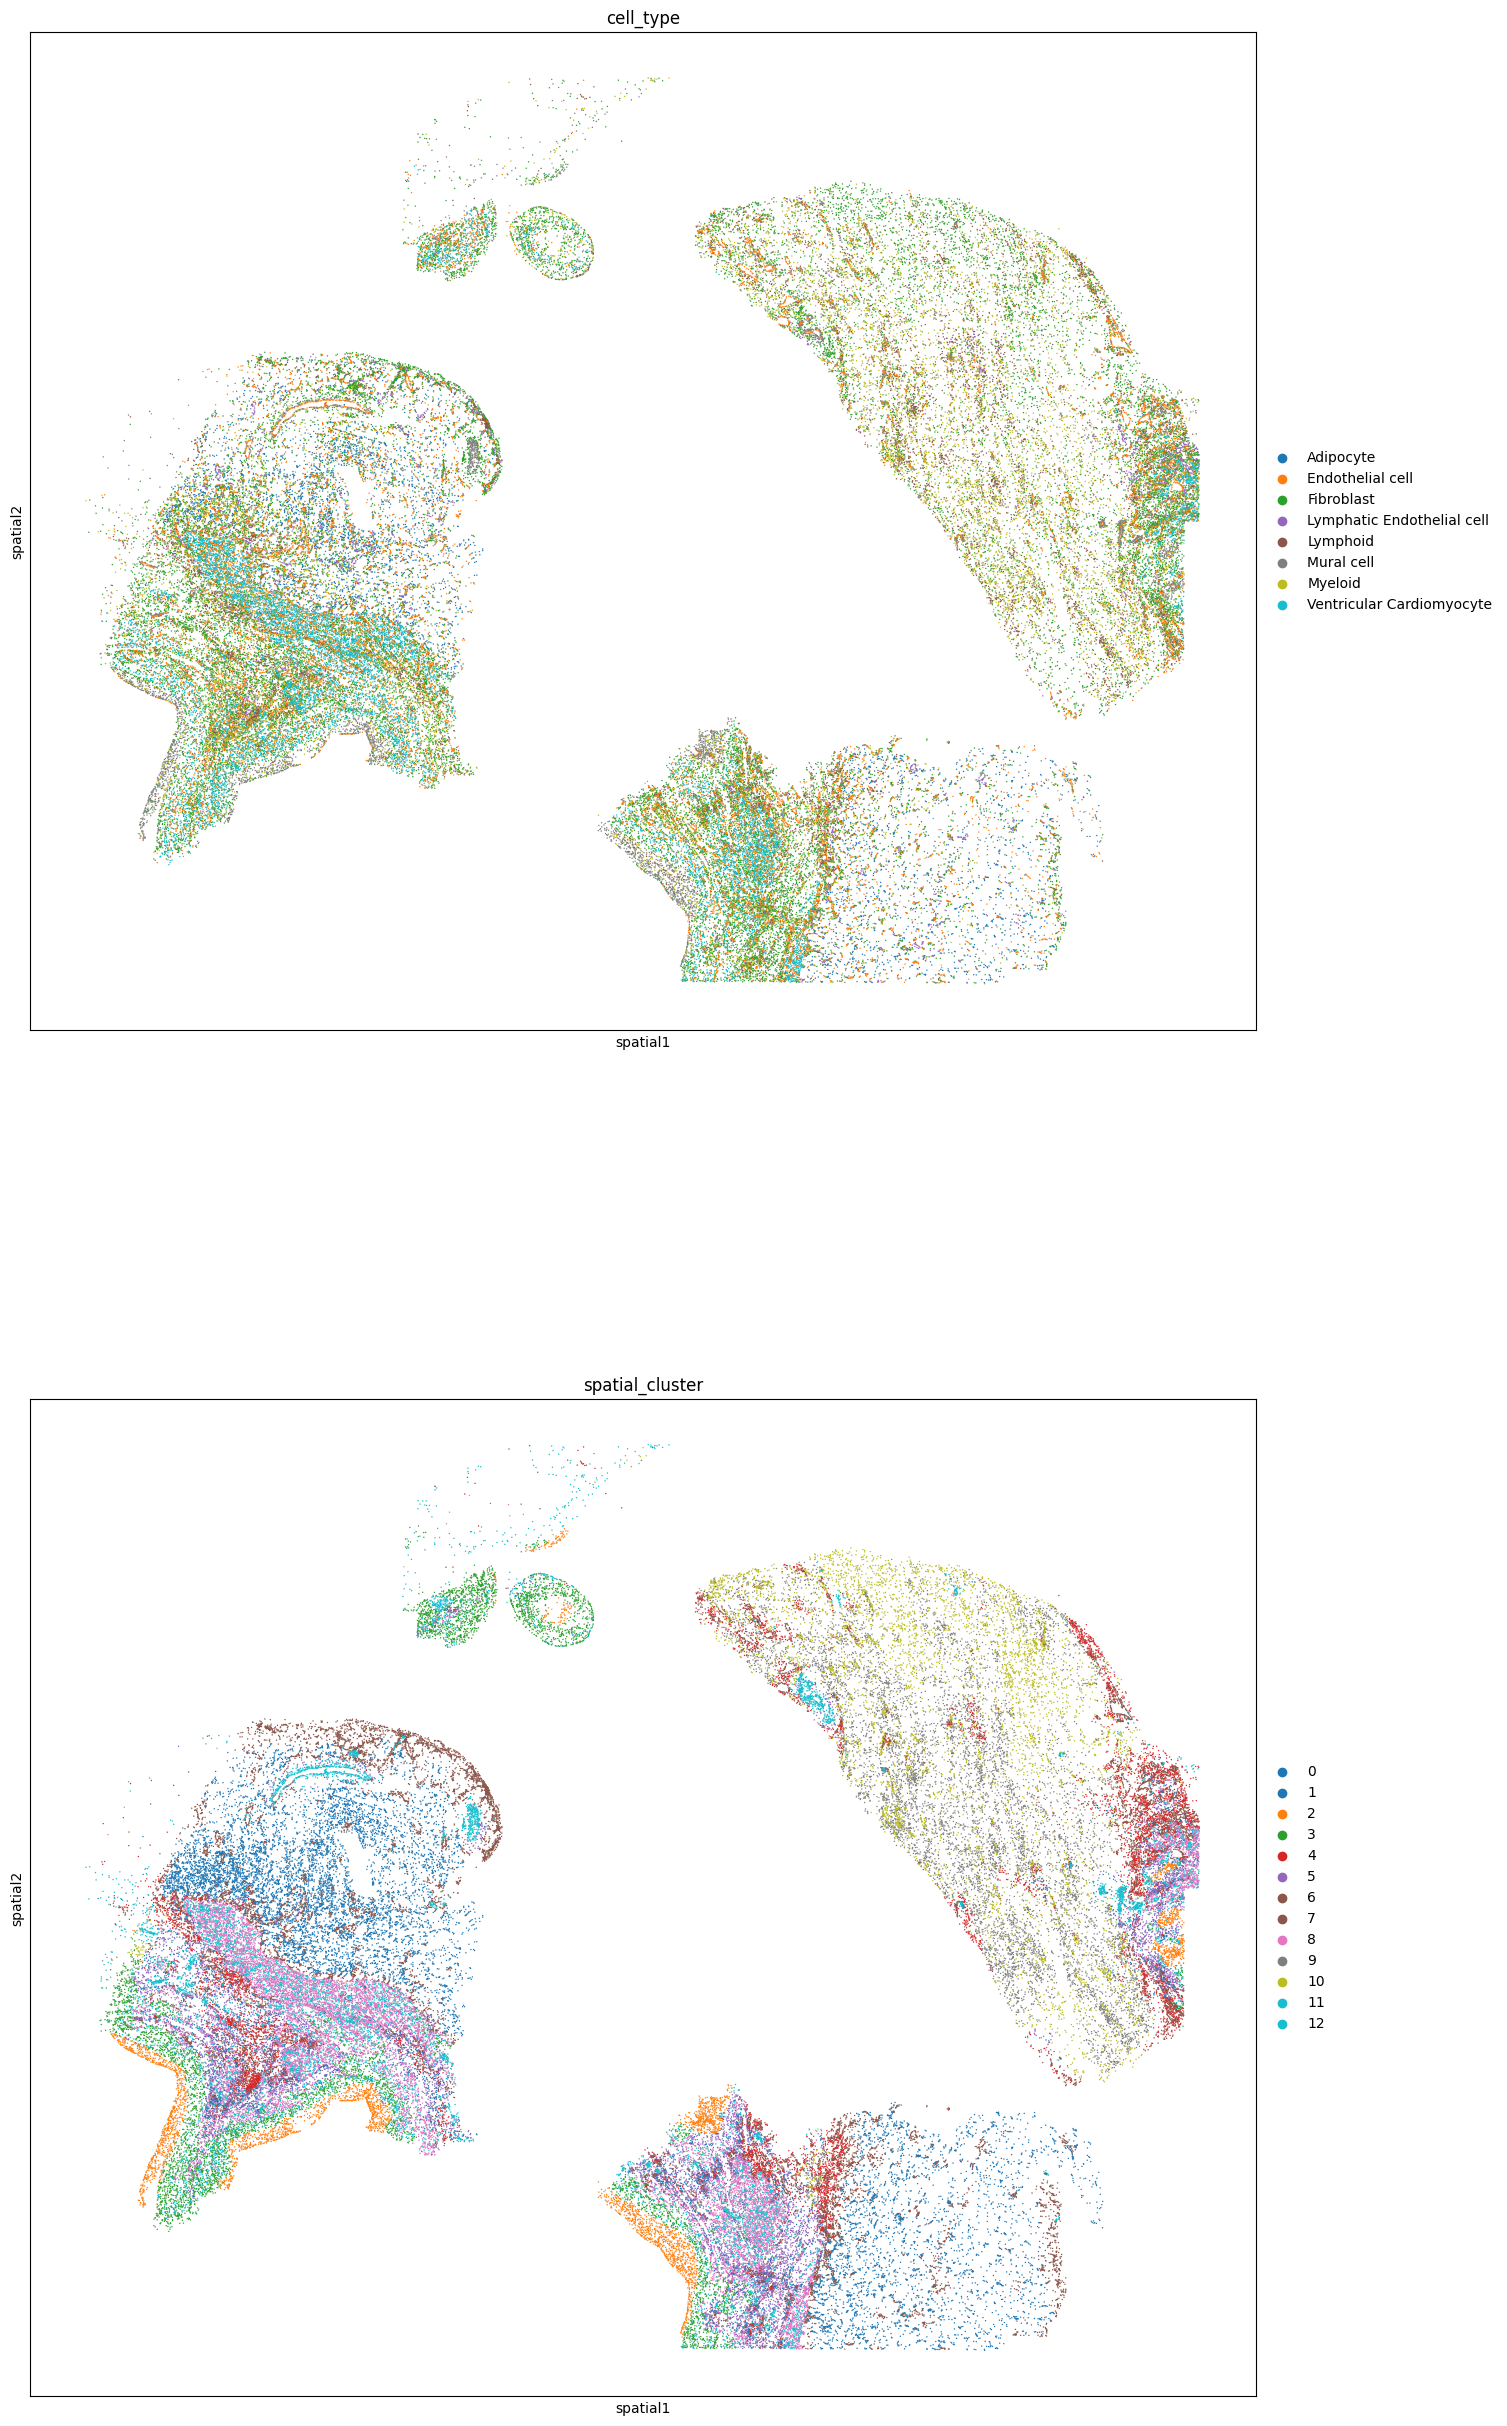

In [29]:
sq.pl.spatial_scatter(
    adata, 
    color=['cell_type','spatial_cluster'], 
    #library_key='fov',  
    size=10, 
    img=None,
    spatial_key='spatial',
    palette='tab10',
    #connectivity_key='spatial_connectivities',
    #img_alpha=0.3,
    figsize=(15,15),
    ncols=1, save='clusters_domains_heart_500.pdf')

## clustered

In [2]:
path = '/work/rwth1209/dana_projects/spatial_domain_tools/CellCharter/heart_500_vk12/cellcharter_heart500_vk12.h5ad'

In [3]:
adata = sc.read_h5ad(f"{path}")
adata

AnnData object with n_obs × n_vars = 87215 × 500
    obs: 'fov', 'volume', 'min_x', 'min_y', 'max_x', 'max_y', 'anisotropy', 'transcript_count', 'perimeter_area_ratio', 'solidity', 'Cellbound2_raw', 'Cellbound2_high_pass', 'Cellbound3_raw', 'Cellbound3_high_pass', 'PolyT_raw', 'PolyT_high_pass', 'Cellbound1_raw', 'Cellbound1_high_pass', 'DAPI_raw', 'DAPI_high_pass', 'region', 'n_counts', 'leiden_0_5', 'leiden_1', 'leiden_1_5', 'tacco', 'cell_type', '_scvi_batch', '_scvi_labels', 'cluster_cellcharter', 'spatial_cluster'
    var: 'mean', 'std'
    uns: '_cellcharter', '_scvi_manager_uuid', '_scvi_uuid', 'cluster_cellcharter_colors', 'leiden', 'leiden_1_5_colors', 'leiden_1_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'spatial', 'spatial_cluster_colors', 'spatial_neighbors', 'tacco_colors', 'umap'
    obsm: 'X_cellcharter', 'X_pca', 'X_scVI', 'X_umap', 'blank_genes', 'spatial', 'tacco'
    varm: 'PCs', 'tacco'
    layers: 'counts'
    obsp: 'connectivities', 'distances', 'sp

/home/xu262605/anaconda3/envs/cellcharter/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
/home/xu262605/anaconda3/envs/cellcharter/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)


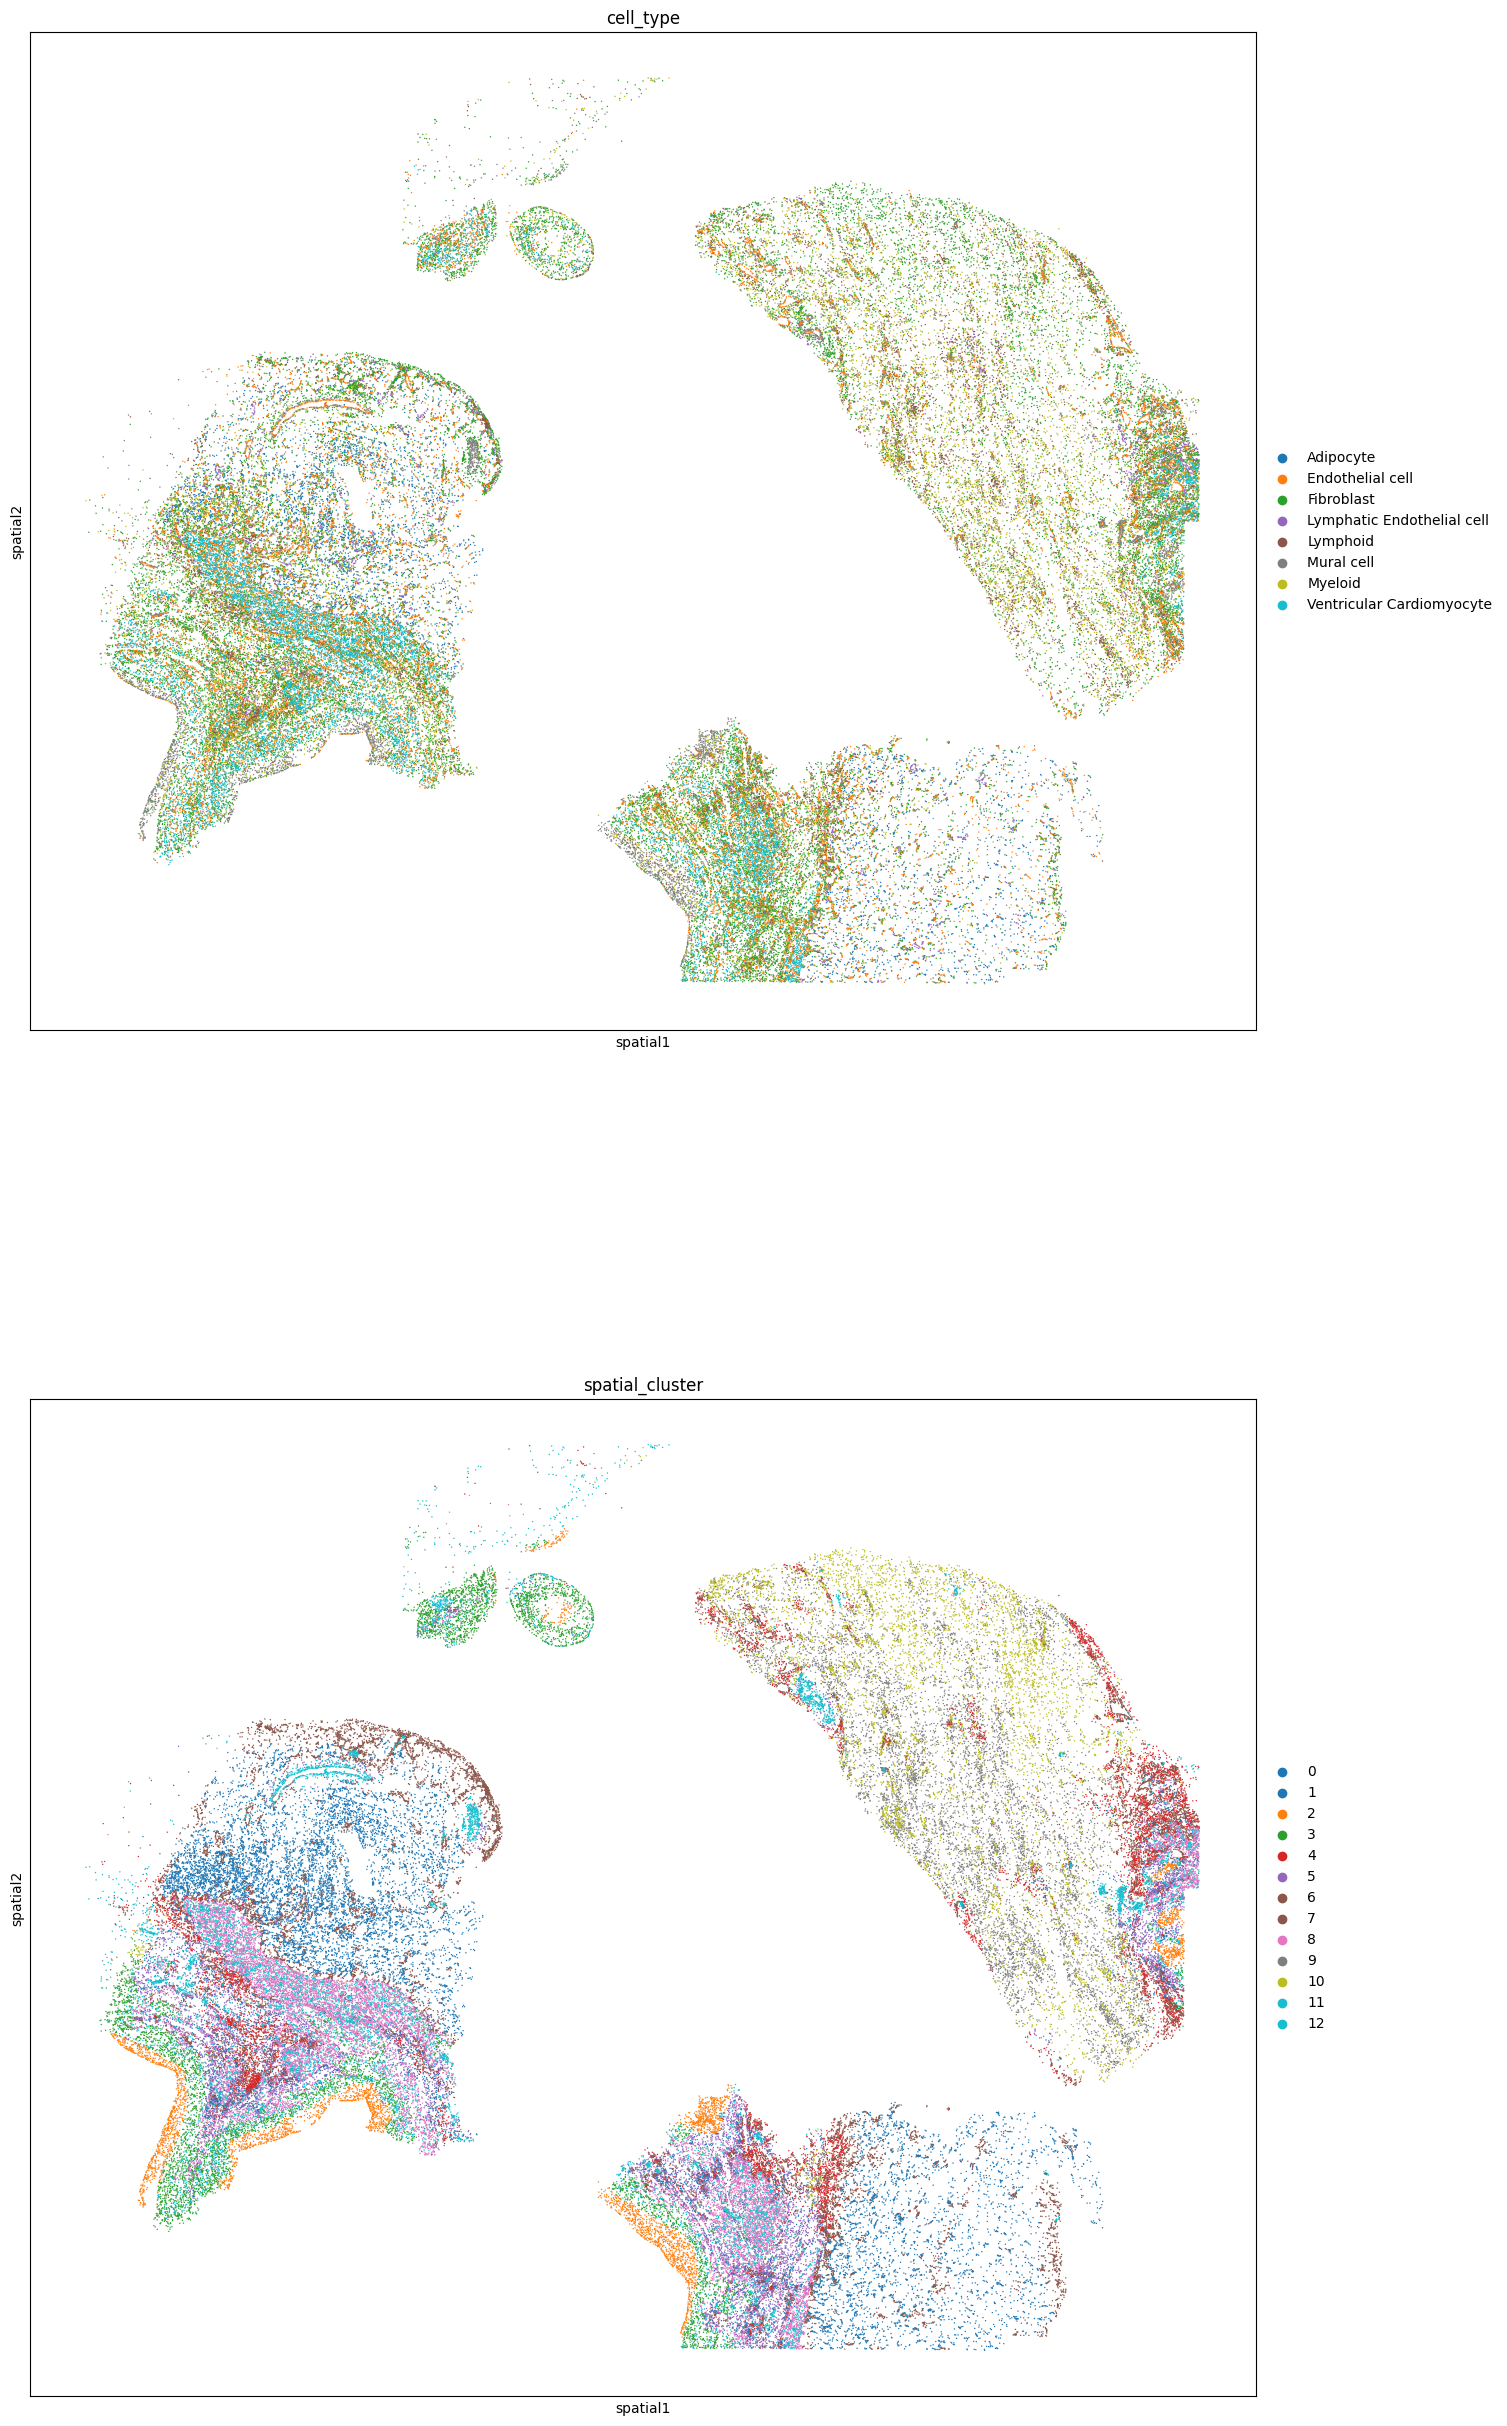

In [4]:
sq.pl.spatial_scatter(
    adata, 
    color=['cell_type','spatial_cluster'], 
    #library_key='fov',  
    size=10, 
    img=None,
    spatial_key='spatial',
    palette='tab10',
    #connectivity_key='spatial_connectivities',
    #img_alpha=0.3,
    figsize=(15,15),
    ncols=1, save='clusters_domains_heart_500.pdf')

In [8]:
gmm = cc.tl.Cluster(
    n_clusters=8, 
    random_state=12345)

In [9]:
gmm.fit(adata, use_rep='X_cellcharter')
adata.obs['spatial_cluster_8'] = gmm.predict(adata, use_rep='X_cellcharter')

/home/xu262605/anaconda3/envs/cellcharter/lib/python3.10/site-packages/lightning_fabric/plugins/environments/slurm.py:165: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/xu262605/anaconda3/envs/cellcharter/lib/python ...
  rank_zero_warn(


/home/xu262605/anaconda3/envs/cellcharter/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)


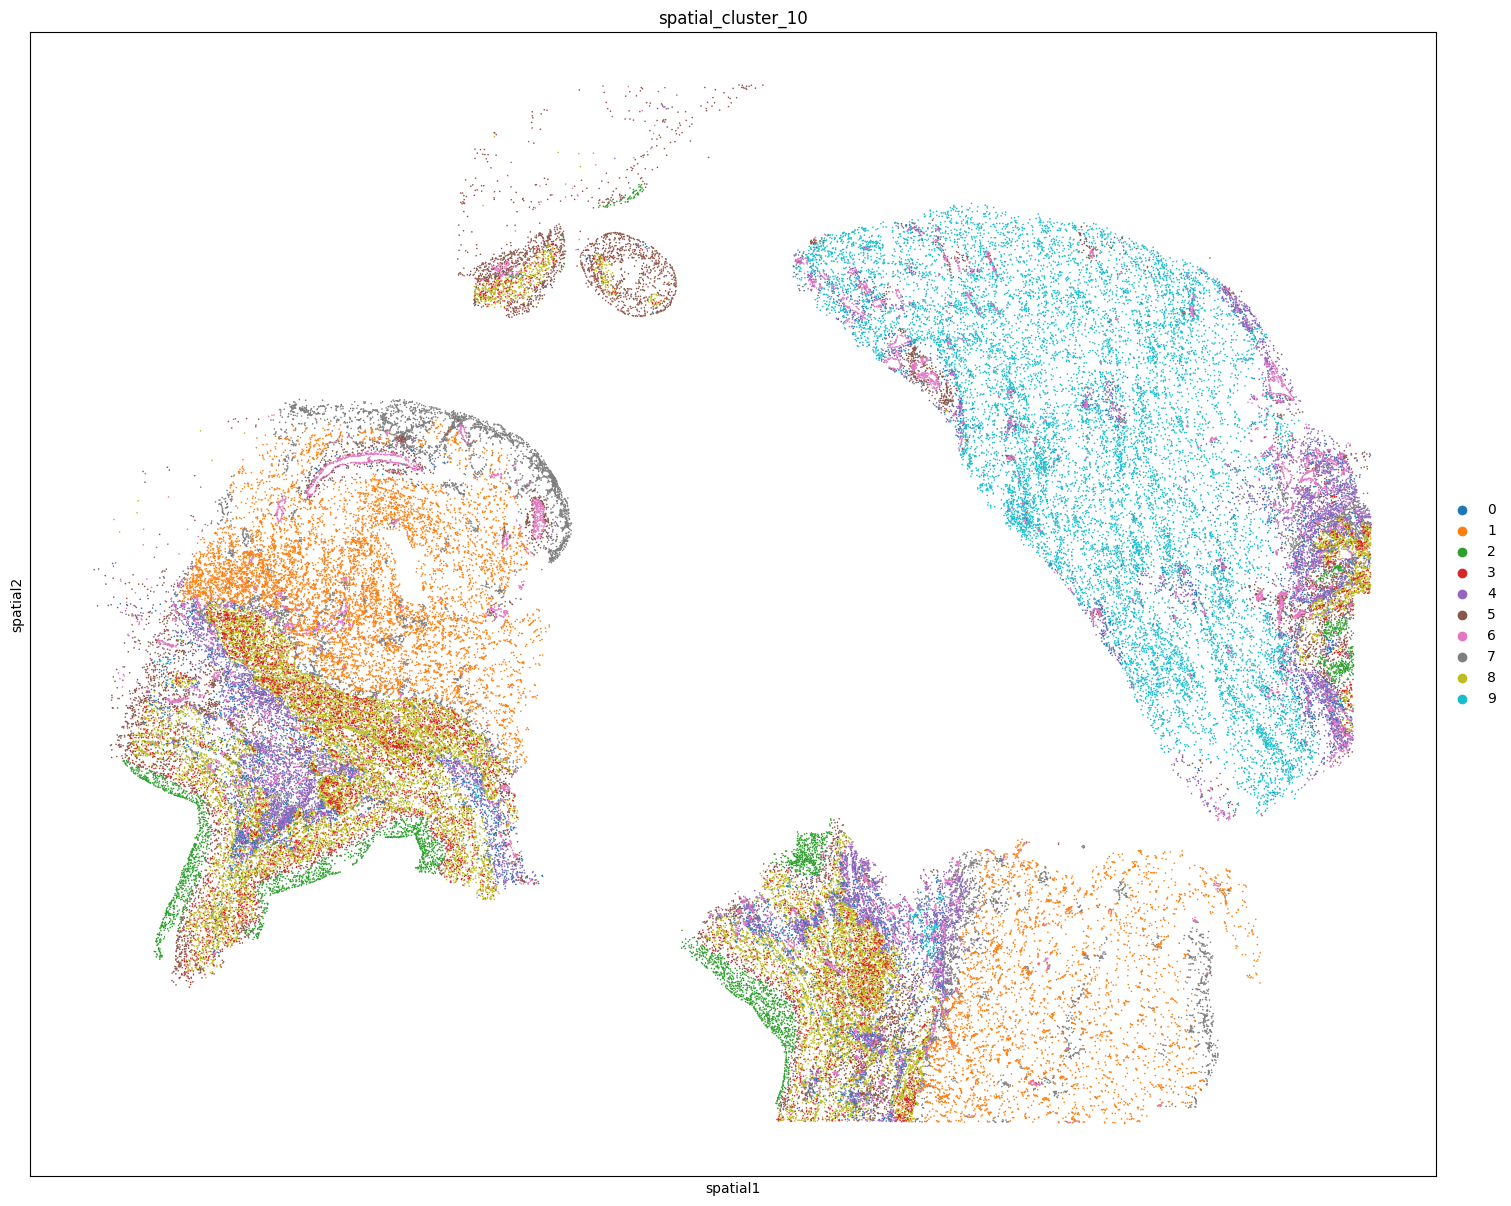

In [7]:
sq.pl.spatial_scatter(
    adata, 
    color=['spatial_cluster_10'], 
    #library_key='fov',  
    size=10, 
    img=None,
    spatial_key='spatial',
    palette='tab10',
    figsize=(15,15),
    ncols=1)

/home/xu262605/anaconda3/envs/cellcharter/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)


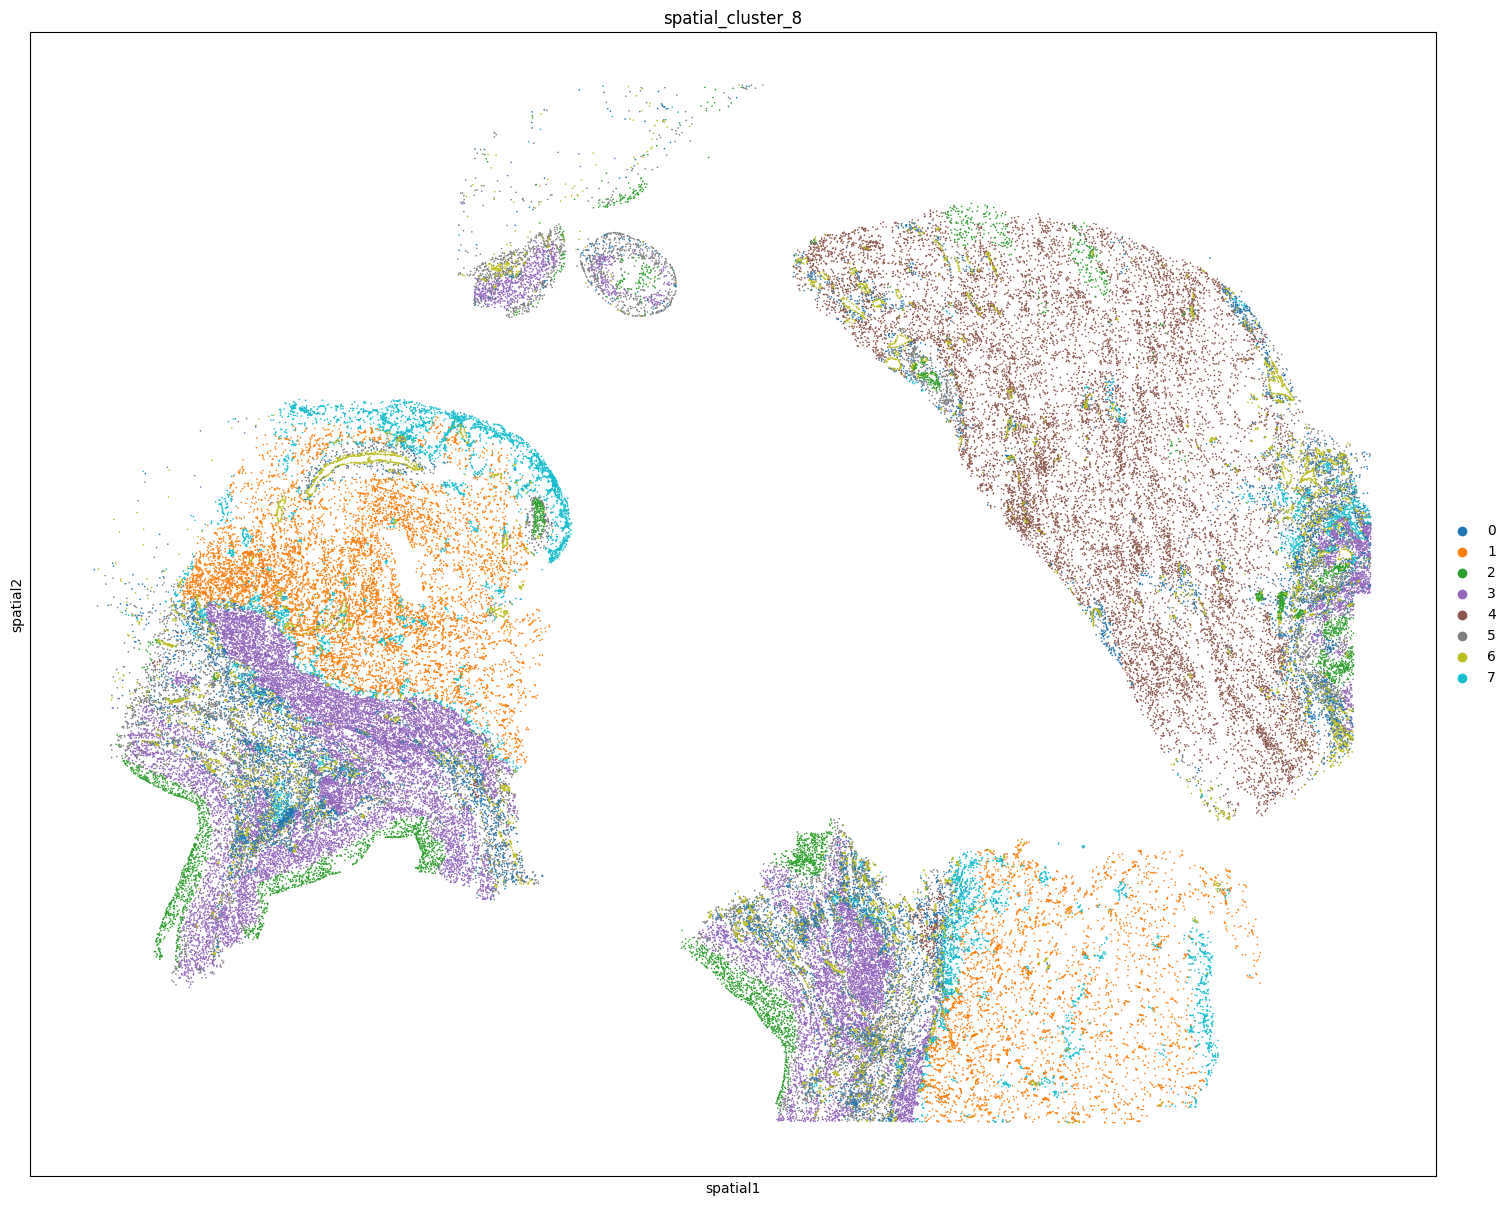

In [10]:
sq.pl.spatial_scatter(
    adata, 
    color=['spatial_cluster_8'], 
    #library_key='fov',  
    size=10, 
    img=None,
    spatial_key='spatial',
    palette='tab10',
    figsize=(15,15),
    ncols=1)

In [11]:
adata.obs

fov       volume        min_x         min_y  \
3325265900002100001    22  2886.628438  8857.740244   9573.972300   
3325265900002100013    22  2718.114498  8869.611733   9597.779039   
3325265900002100018    22  2099.689711  8945.705322   9603.049285   
3325265900002100023    22  1839.210643  8905.900696   9622.146514   
3325265900002100025    22  1766.958535  8916.052474   9626.682381   
...                   ...          ...          ...           ...   
3325268800170200179  2447   430.241505  1073.109528  11300.895965   
3325268800170200195  2447   688.978318  1088.908128  11320.220645   
3325268800170200214  2449  1500.007513  1493.772515  11340.658289   
3325268800171100101  2440  1865.164374  1640.961483  11186.741518   
3325268800171100123  2450  1896.182414  1649.663235  11217.878536   

                           max_x         max_y  anisotropy  transcript_count  \
3325265900002100001  8872.406847   9601.736165    1.945604                27   
3325265900002100013  8886.651280   9622.239265    1.554463               148   
3325265900002100018  8961.519481   9620.899536    1.163686                44   
3325265900002100023  8918.637869   9644.325352    2.127845               132   
3325265900002100025  8929.976547   9642.632456    1.190092                42   
...                          ...           ...         ...               ...   
3325268800170200179  1080.573404  11308.766971    1.359034                26   
3325268800170200195  1100.351895  11332.379222    2.310785                28   
3325268800170200214  1504.765619  11358.395733    1.731947               103   
3325268800171100101  1657.308949  11204.468358    1.053286               160   
3325268800171100123  1662.895502  11240.725767    1.803329               162   

                     perimeter_area_ratio  solidity  ...  leiden_1  \
3325265900002100001              0.275619  5.914615  ...        12   
3325265900002100013              0.246088  6.677330  ...        12   
3325265900002100018              0.265982  6.957701  ...        12   
3325265900002100023              0.330637  6.405183  ...        12   
3325265900002100025              0.279851  6.949542  ...         6   
...                                   ...       ...  ...       ...   
3325268800170200179              0.598308  6.761362  ...         7   
3325268800170200195              0.549081  6.336052  ...         3   
3325268800170200214              0.336777  6.506415  ...         2   
3325268800171100101              0.315365  6.179487  ...        12   
3325268800171100123              0.339478  5.913840  ...        12   

                     leiden_1_5             tacco         cell_type  \
3325265900002100001          15        Fibroblast        Mural cell   
3325265900002100013          15        Fibroblast        Mural cell   
3325265900002100018          15        Fibroblast        Mural cell   
3325265900002100023          15        Fibroblast        Mural cell   
3325265900002100025           1           Myeloid           Myeloid   
...                         ...               ...               ...   
3325268800170200179           6        Fibroblast        Fibroblast   
3325268800170200195          13           Myeloid           Myeloid   
3325268800170200214           9  Endothelial cell  Endothelial cell   
3325268800171100101          15        Fibroblast        Mural cell   
3325268800171100123          15        Fibroblast        Mural cell   

                     _scvi_batch  _scvi_labels  cluster_cellcharter  \
3325265900002100001            0             0                    3   
3325265900002100013            0             0                    3   
3325265900002100018            0             0                    3   
3325265900002100023            0             0                    3   
3325265900002100025            0             0                    3   
...                          ...           ...                  ...   
3325268800170200179            3         

/home/xu262605/anaconda3/envs/cellcharter/lib/python3.10/site-packages/scanpy/tools/_dendrogram.py:135: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_df = rep_df.groupby(level=0).mean()


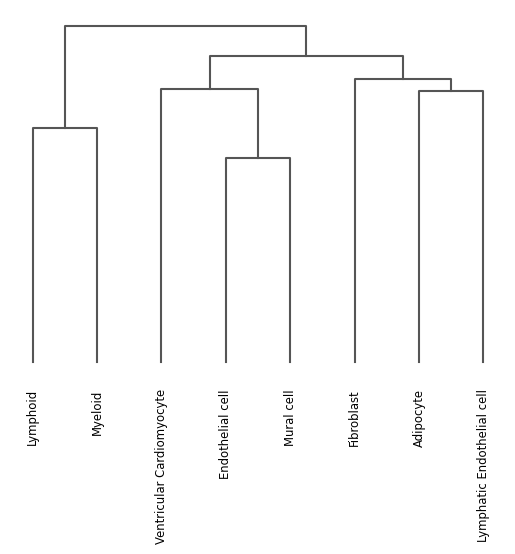

<Axes: >

In [12]:
sc.pl.dendrogram(adata, groupby='cell_type')

/home/xu262605/anaconda3/envs/cellcharter/lib/python3.10/site-packages/scanpy/tools/_dendrogram.py:135: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_df = rep_df.groupby(level=0).mean()


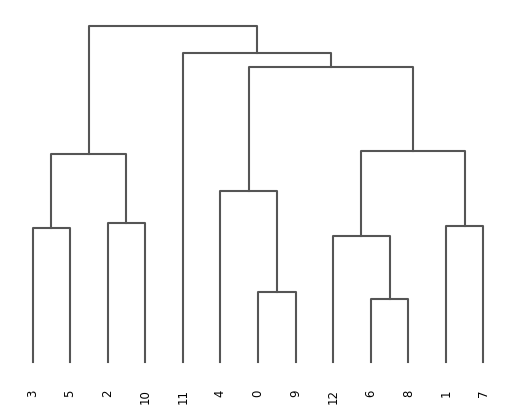

<Axes: >

In [13]:
sc.pl.dendrogram(adata, groupby='spatial_cluster')

/home/xu262605/anaconda3/envs/cellcharter/lib/python3.10/site-packages/scanpy/tools/_dendrogram.py:135: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_df = rep_df.groupby(level=0).mean()


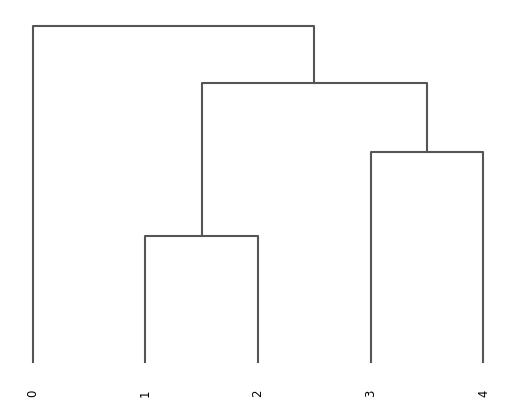

<Axes: >

In [14]:
sc.pl.dendrogram(adata, groupby='cluster_cellcharter')